In [98]:
import pandas as pd
import glob
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import os

In [111]:
def import_folder(folder):
    filenames = glob.glob("data/" + folder + "/*.tsd")

    files = [file.split('\\')[1].split('.')[0] for file in filenames]

    signs = pd.DataFrame()
    for filename in files:
        df = pd.read_table('data/' + folder +'/' + filename + '.tsd', header=None)
        label = filename.split('-')[0]
        ID = filename.rsplit('-', 1)[1]
        df['label'] = label
        df['ID'] = int(ID)
        df.columns = ['x_L','y_L','z_L','roll_L','pitch_L','yaw_L','thumb_L','fore_L','middle_L','ring_L','little_L','x_R','y_R','z_R','roll_R','pitch_R','yaw_R','thumb_R','fore_R','middle_R','ring_R','little_R', 'label', 'ID']
        signs = signs.append(df)
        
    return signs


In [112]:
def temporal_scale(signs):
    IDs = signs['ID'].drop_duplicates().values
    labels = signs['label'].drop_duplicates().values
    signs_new = pd.DataFrame(columns = signs.columns)
    for ID in IDs:
        for sign in labels:

            df = signs[(signs['ID'] == ID) & (signs['label'] == sign)]

            df = df[['x_L', 'y_L', 'z_L', 'roll_L', 'pitch_L', 'yaw_L', 'thumb_L', 'fore_L',
                   'middle_L', 'ring_L', 'little_L', 'x_R', 'y_R', 'z_R', 'roll_R',
                   'pitch_R', 'yaw_R', 'thumb_R', 'fore_R', 'middle_R', 'ring_R',
                   'little_R']]

            df_new = pd.DataFrame(index=np.arange(57), columns = df.columns)

            for column in df:    
                column_resample = np.fft.irfft(np.fft.rfft(df[column]), 57)
                df_new[column] = column_resample

            df_new['label'] = sign
            df_new['ID'] = ID
            signs_new = signs_new.append(df_new)
    return signs_new
    

In [113]:
root='data'
signs_all = pd.DataFrame()
signs_all_ts = pd.DataFrame()
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
for folder in dirlist:
    signs = import_folder(folder)
    signs_ts = temporal_scale(signs)
    signs_all = signs_all.append(signs)
    signs_all_ts = signs_all_ts.append(signs_ts)

In [10]:
Ids = signs['ID'].drop_duplicates().values

C:\Users\anura\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


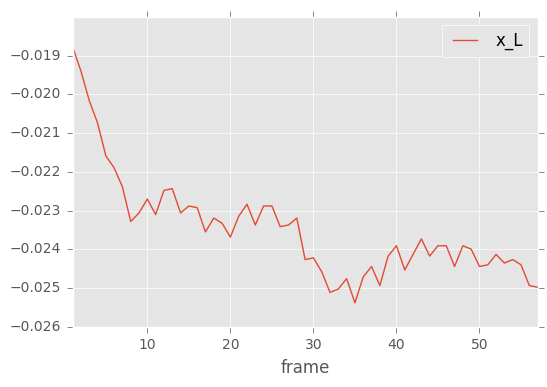

In [11]:
plot_x(Ids[0])

In [14]:
plot_x(Ids[3])

IndexError: index 3 is out of bounds for axis 0 with size 3

In [15]:
Ids

array([1, 2, 3], dtype=int64)

In [21]:
df = signs[(signs['ID'] == 1)]

frame,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
label,,,,,,,,,,,,,,,,,,,,,
zero,-0.025557,-0.025378,-0.024217,-0.024217,-0.025467,-0.025869,-0.025467,-0.025467,-0.026271,-0.026092,...,-0.02761,-0.027923,-0.028146,-0.027566,-0.027209,-0.027298,-0.027655,-0.027164,-0.027075,-0.027253


In [43]:
signs['frame'] = signs.groupby(['label', 'ID']).cumcount() + 1

In [48]:
signs[signs['ID'] == 1].pivot(columns = 'frame', values = 'x_L', index = 'label').index

Index(['God', 'I', 'Norway', 'alive', 'all', 'answer', 'boy', 'building',
       'buy', 'change_mind_', 'cold', 'come', 'computer_PC_', 'cost', 'crazy',
       'danger', 'deaf', 'different', 'draw', 'drink', 'eat', 'exit', 'flash',
       'forget', 'girl', 'give', 'glove', 'go', 'happy', 'head', 'hear',
       'hello', 'his_hers', 'hot', 'how', 'hurry', 'hurt', 'innocent',
       'is_true_', 'joke', 'juice', 'know', 'later', 'lose', 'love', 'make',
       'man', 'maybe', 'mine', 'money', 'more', 'name', 'no', 'not', 'paper',
       'pen', 'please', 'polite', 'question', 'read', 'ready', 'research',
       'responsible', 'right', 'sad', 'same', 'science', 'share', 'shop',
       'soon', 'sorry', 'spend', 'stubborn', 'surprise', 'take', 'temper',
       'thank', 'think', 'tray', 'us', 'voluntary', 'wait_notyet_', 'what',
       'when', 'where', 'which', 'who', 'why', 'wild', 'will', 'write',
       'wrong', 'yes', 'you', 'zero'],
      dtype='object', name='label')

In [53]:
df = signs[(signs['ID'] == 2) & (signs['label'] == 'answer')]

In [54]:
a = df['x_L']

In [58]:
a_resamp = np.fft.irfft(np.fft.rfft(a), 65)

In [59]:
df2 = pd.DataFrame()
df2['x_L'] = a_resamp

In [94]:
signs_new = temporal_scale(signs)

In [95]:
len(signs_new)

16245

In [90]:
len(labels)

95

In [114]:
len(signs_all)

146949

In [115]:
len(signs_all_ts)

146205

In [ ]:
t